# Taylor series

This notebook contains simple analysis of the Taylor series. In Sec. 1, we introduce the mathematical basics of the Taylor and Maclaurin series. In Sec. 2, we implement a class defining Taylor/Maclaurin series. In Sec. 3, we perform a simple visual analysis of selected functions.

Section 1 is based on section 4.6. of the following book:

*Riley, Kenneth Franklin, Michael Paul Hobson, and Stephen John Bence. Mathematical methods for physics and engineering: a comprehensive guide. Cambridge university press, 2006.*

## 1. Mathematical backgroung

### 1.1. Taylor series.

From the book:

*'Suppose that we have a function $f(x)$ that we wish to express as a power series in $x−a$ about the point $x = a$. We shall assume that, in a given $x$-range, $f(x)$ is a continuous, single-valued function of $x$ having continuous derivatives with respect to $x$, denoted by $f'(x)$, $f''(x)$ and so on, up to and including $f^{(n−1)}(x)$. We shall also assume that $f^{(n)}(x)$ exists in this range'*

One can then write $f(x)$ given the values of the function and its dervatives at $x=a$ [Eq. (4.18) from the book]

$$f(x) = f(a) + (x-a)f'(a) + \frac{(x-a)^2}{2!}f''(a)+...+\frac{(x-a)^{n-1}}{(n-1)!}f^{(n-1)}(a)+R_n(x),$$

where $R_n(x)$ is the remainder given by [Eq. (4.19) from the book]

$$ R_n(x)=\frac{(x-a)^n}{n!}f^{(n)}(ζ), \quad ζ\in [a,x]. $$

Based on the first equation, we can approximate $f(x)$ near $x=a$ by the $N$-th order polynomial

$$ f_N(x) = \sum_{k=0}^N \frac{(x-a)^k}{k!}f^{(k)}(a) = \sum_{k=0}^N c_k (x-a)^k.$$

with $R_n(x)$ representing the error. The polynomial coefficients are

$$ c_k = \frac{f^{(k)}(a)}{k!}. $$

We will code $f_N(x)$ in Sec. 2.

### 1.2. Maclaurin series.

Maclaurin series is Taylor series taken for $a=0$. Then

$$ f_N(x) = \sum_{k=0}^N \frac{x^k}{k!}f^{(k)}(0). $$

## 2. Define a class for Taylor/Maclaurin series.

We can use two methods to calculate Taylor series.
1. Use `scipy.interpolate.approximate_taylor_polynomial()`. That automatically computes the Taylor series.
2. Code Taylor series ourselves.

For educational reasons we will use the second method and define the `TaylorSeries` class. It should take the following inputs:
* `f`: function to be approximated.
* `a`: point around which the function is expanded. We will set the default value to `a=0`, as in Maclaurin series.

The class will have the following methods:
* `get_taylor_series_coefficients(self, polynomial_degree)`: returns the coefficients of Taylor `polynomial_degree` series. `polynomial_degree` is $N$ in equations above. The coefficients are $c_k$'s in equations above.
* `generate_taylor_series_values(self, polynomial_degree, x_list)`: generates a list of Taylor series values for the arguments in `x_list`.
* `generate_function_values(self, x_list)`: generates a list of the function values for the arguments in `x_list`.


In [190]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [191]:
class TaylorSeries():
  """
  Class used for the Taylor series analysis.
  """
  def __init__(self, function, a):
    # Save input variables
    self.function = function
    self.a = a

  def generate_function_values(self, x_list):
    """
    Evaluates the original function for each point in x_list.
    Returns the list of results.
    """
    results = []
    for x in x_list:
      results.append( self.function(x) )

    return results

  def get_taylor_series_coefficients(self, polynomial_degree, dx = 0.001):
    """
    Returns the list with Taylor polynomial coefficients c_k.

    Parameters:
      * polynomial_degree: int
        Degree of the Taylor approximation polynomial
      * dx: float, default = 0.01
        Spacing used to compute derivative. We use scipy to compute derivatives,
        it uses finite difference formula.
    """
    # Intialize the list to store coefficients
    coefficients = []

    # Loop over all polynomial powers (sum over k in equations above)
    for k in range(polynomial_degree + 1):
      # Compute the derivative in c_k coefficient.
      derivative = scipy.misc.derivative(self.function,
                                         x0 = self.a,
                                         dx = dx,
                                         n = k,
                                         order = 2*k + 1)
      # Compute the factorial (denominator)
      factorial = scipy.special.factorial( k )

      # Append the c_k coefficient to the list
      coefficients.append(derivative / factorial)

    return coefficients

  def generate_taylor_series_values(self, polynomial_degree, x_list, dx = 0.001):
    """
    Evaluates the Taylor series approximation of `polynomial_degree` degree for
    each point in x_list. Returns the list of results.

    Parameters:
      * polynomial_degree: int
        Degree of Taylor series polynomial to be used to approximate the function.
      * x_list: list of floats
        List of arguments to evaluate the original function on.
      * dx: float, default value: 0.001
        Spacing used to compute derivatives for finite difference method.
    """
    # Get taylor coefficients
    taylor_coefficients = self.get_taylor_series_coefficients(
        polynomial_degree = polynomial_degree,
        dx = dx
      )

    # Evaluate the polynomial for each value in x_list
    return np.polyval( p = list(reversed(taylor_coefficients)), x = x_list - self.a )

## 3. Evaluate the `TaylorSeries()` class

We will consider 3 custom functions to evaluate the `TaylorSeries()` class:
* $f(x) = 3 + 10x + 4x^2 - x^5$, expansion about $x=0$,
* $g(x) = \sin(x)$, expansion about $x=0$,
* $h(x) = \sin(x)$, expansion about $x=\pi$.

### 3.1. Test Taylor series on a polynomial

$$f(x) = 3 + 10x + 4x^2 - x^5.$$

We expand about $x=0$ (Maclaurin series). The expected final result should be near perfection, the only error should come from finite difference method.

In [192]:
# Define the function
def f(x):
  return 3 + 10*x + 4*x**2 - x**5

# Instantiate the TylorSeries() class for that function
polynomial_taylor_series = TaylorSeries( function = f, a = 0)

In [193]:
# Get Taylor series coefficients
f_taylor_coefficients = polynomial_taylor_series.get_taylor_series_coefficients(
    polynomial_degree=5, dx = 1e-2
)
f_taylor_coefficients

<ipython-input-191-003e0861ec0d>:38: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative = scipy.misc.derivative(self.function,


[3.0,
 9.999999990000008,
 3.9999999999945635,
 1.3877787807814454e-10,
 -2.162621933384419e-08,
 -1.0000000966181586]

Observe that the list of values is close to the original coefficients. Let's round the result.

For rounding we used https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places

In [194]:
f_taylor_coefficients = [ round(elem, 2) for elem in f_taylor_coefficients ]
f_taylor_coefficients

[3.0, 10.0, 4.0, 0.0, -0.0, -1.0]

The coefficients look the same as in original function!

Plot the original function and its Taylor approximation.

In [195]:
# Generate list of x values
x_list = np.linspace(start = -3, stop = 3, num = 100)
# Compute the output of original function
original_function = polynomial_taylor_series.generate_function_values(x_list = x_list)
# Compute the Taylor series approximation
taylor_approximation = polynomial_taylor_series.generate_taylor_series_values(
    polynomial_degree = 5,
    x_list = x_list,
    dx = 0.01
)

<ipython-input-191-003e0861ec0d>:38: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative = scipy.misc.derivative(self.function,


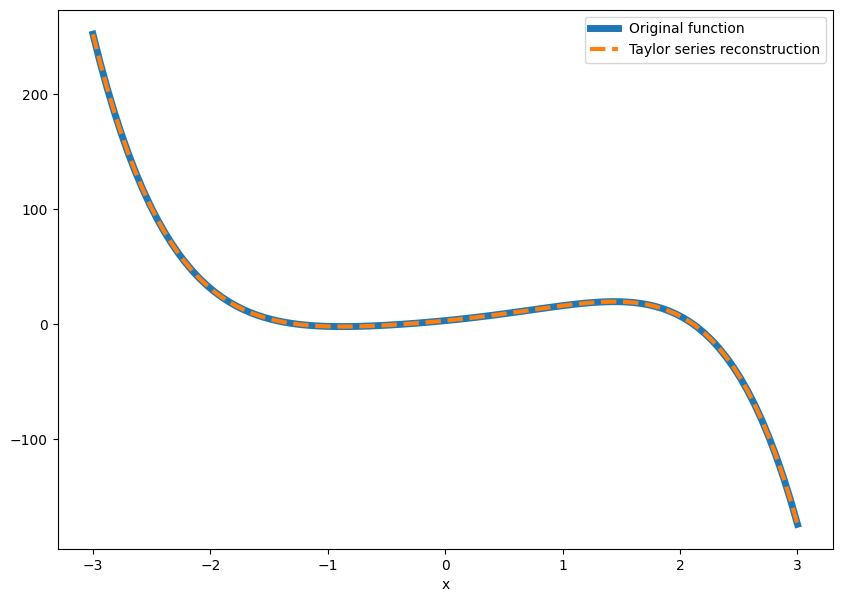

In [196]:
plt.figure(figsize=(10,7))
plt.plot(x_list, original_function, linewidth = 5, label = "Original function")
plt.plot(x_list, taylor_approximation, '--', linewidth = 3, label = "Taylor series reconstruction")
plt.xlabel("x")
plt.legend()

### 4.2. Taylor series for $\sin$ function. Expansion about $x=0$.

We will compare results of approximations up to the order of $N=5$

<ipython-input-191-003e0861ec0d>:38: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative = scipy.misc.derivative(self.function,


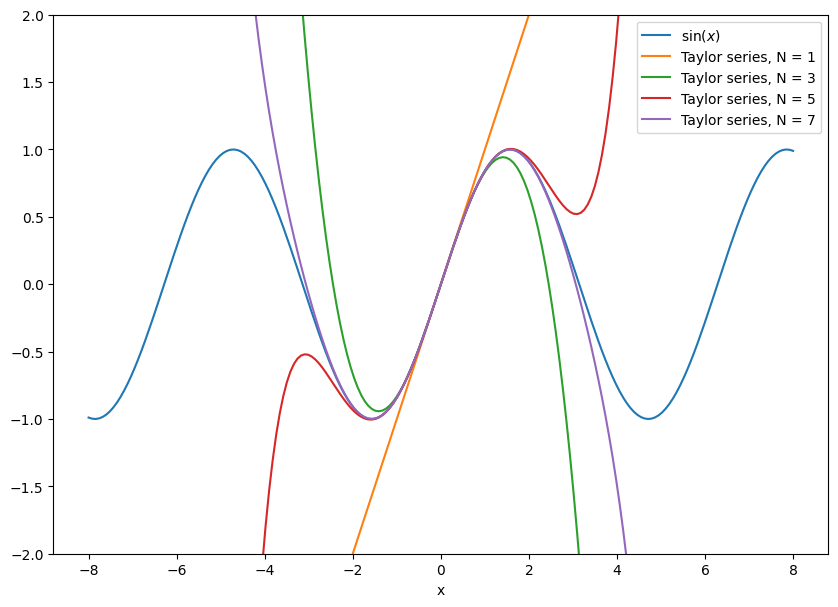

In [197]:
def g(x):
  return np.sin(x)

# Instiantiate the class
sin_maclaurin_series = TaylorSeries(function = g, a = 0)

# Setup the list of values to evaluate the function on
x_list = np.linspace(-8, 8, 200)

# Generate the list of function values
original_function = sin_maclaurin_series.generate_function_values(x_list = x_list)

# Make plots
plt.figure(figsize = (10, 7))
plt.plot(x_list, original_function, label = r"$\sin(x)$")

degrees = [1, 3, 5, 7]

# Loop over different Taylor expansion degrees
for k in degrees:
  # Evaluate the Taylor expansion
  taylor_approximation = sin_maclaurin_series.generate_taylor_series_values(
    polynomial_degree = k,
    x_list = x_list,
    dx = 0.01
  )
  # Plot the result
  plt.plot(x_list, taylor_approximation, label = f"Taylor series, N = {k}")
plt.ylim(bottom = -2, top = 2)
plt.xlabel("x")
plt.legend();

Note that with higher degree polynomials the approximation remains valid over broader range.

### 4.3. Taylor series for $\sin$ function. Expansion about $x=\pi$.

<ipython-input-191-003e0861ec0d>:38: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative = scipy.misc.derivative(self.function,


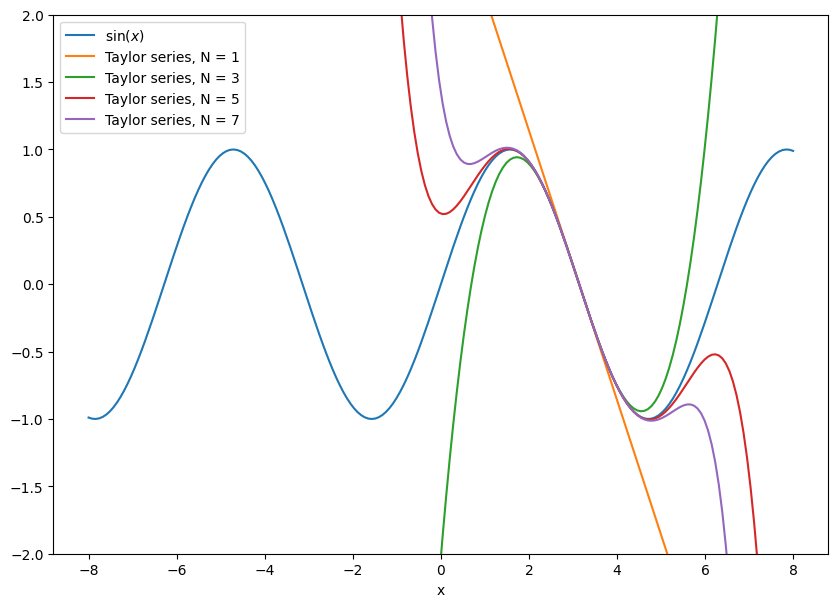

In [198]:
def h(x):
  return np.sin(x)

# Instiantiate the class
sin_maclaurin_series = TaylorSeries(function = g, a = np.pi)

# Setup the list of values to evaluate the function on
x_list = np.linspace(-8, 8, 200)

# Generate the list of function values
original_function = sin_maclaurin_series.generate_function_values(x_list = x_list)

# Make plots
plt.figure(figsize = (10, 7))
plt.plot(x_list, original_function, label = r"$\sin(x)$")

degrees = [1, 3, 5, 7]

# Loop over different Taylor expansion degrees
for k in degrees:
  # Evaluate the Taylor expansion
  taylor_approximation = sin_maclaurin_series.generate_taylor_series_values(
    polynomial_degree = k,
    x_list = x_list,
    dx = 0.01
  )
  # Plot the result
  plt.plot(x_list, taylor_approximation, label = f"Taylor series, N = {k}")
plt.ylim(bottom = -2, top = 2)
plt.xlabel("x")
plt.legend();

Now the Taylor series approximates the function well about $x=\pi$ instead of $x=0$.